In [7]:
import pandas as pd
import numpy as np
import random
import sys
sys.path.append('../..')
from modules.many_features import utils, constants

#### Test df

In [8]:
test_df = pd.read_csv('../../test_dfs/many_features/0.1/correlated/test_df3_noisy6_23000000.csv')
test_df.head()

,episode_length,index,is_success,reward,terminated,trajectory,y_actual,y_pred
0,4.0,0.0,1.0,1.0,0.0,"['hemoglobin', 'mcv', 'segmented_neutrophils',...",1.0,1.0
1,4.0,1.0,0.0,-1.0,0.0,"['hemoglobin', 'mcv', 'ret_count', 'Aplastic a...",5.0,6.0
2,5.0,2.0,1.0,1.0,0.0,"['hemoglobin', 'gender', 'mcv', 'tibc', 'Anemi...",3.0,3.0
3,4.0,3.0,0.0,-1.0,1.0,"['hemoglobin', 'mcv', 'segmented_neutrophils',...",2.0,7.0
4,4.0,4.0,0.0,-1.0,1.0,"['hemoglobin', 'mcv', 'segmented_neutrophils',...",0.0,7.0


../..\modules\many_features\utils.py:338: MatplotlibDeprecationWarning:


The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.

../..\modules\many_features\utils.py:339: MatplotlibDeprecationWarning:


The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.

../..\modules\many_features\utils.py:341: MatplotlibDeprecationWarning:


The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.

../..\modules\many_features\utils.py:342: MatplotlibDeprecationWarning:


The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.



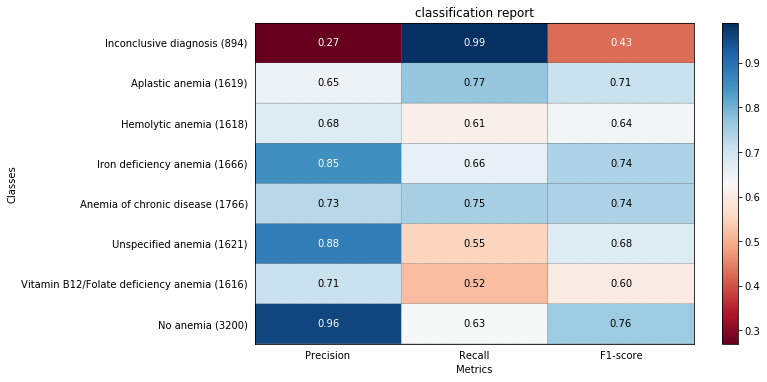

In [9]:
utils.plot_classification_report(test_df['y_actual'], test_df['y_pred'])

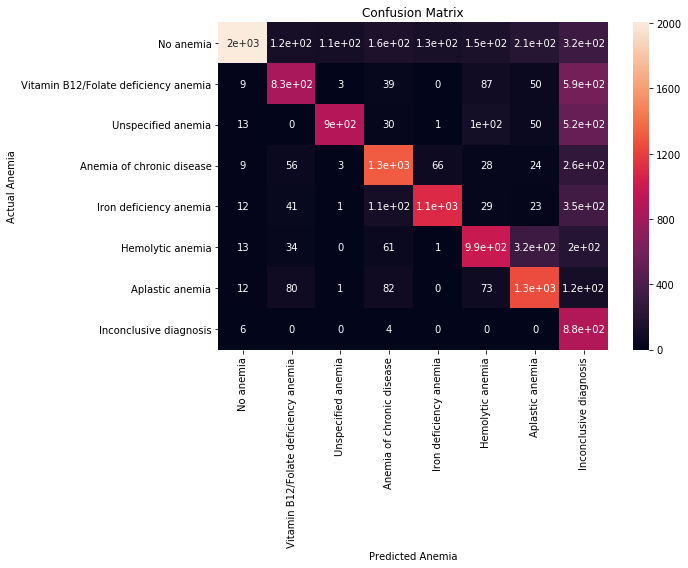

In [10]:
utils.plot_confusion_matrix(test_df['y_actual'], test_df['y_pred'])

In [11]:
utils.draw_sankey_diagram(test_df, 'Overall pathways', save=True, 
                          filename='../../pathways/many_features/0.1/correlated/test_df3_noisy6_230000000')

frequency_dict: {"['hemoglobin', 'mcv', 'segmented_neutrophils', 'Vitamin B12/Folate deficiency anemia']": 1017, "['hemoglobin', 'mcv', 'ret_count', 'Aplastic anemia']": 1408, "['hemoglobin', 'gender', 'mcv', 'tibc', 'Anemia of chronic disease']": 251, "['hemoglobin', 'mcv', 'segmented_neutrophils', 'Inconclusive diagnosis']": 1298, "['hemoglobin', 'mcv', 'ret_count', 'gender', 'Inconclusive diagnosis']": 56, "['hemoglobin', 'mcv', 'tibc', 'Inconclusive diagnosis']": 496, "['hemoglobin', 'mcv', 'segmented_neutrophils', 'Unspecified anemia']": 867, "['hemoglobin', 'gender', 'No anemia']": 1369, "['hemoglobin', 'gender', 'mcv', 'segmented_neutrophils', 'Unspecified anemia']": 140, "['hemoglobin', 'mcv', 'ret_count', 'gender', 'Hemolytic anemia']": 257, "['hemoglobin', 'mcv', 'ret_count', 'Hemolytic anemia']": 979, "['hemoglobin', 'mcv', 'tibc', 'Anemia of chronic disease']": 1307, "['hemoglobin', 'mcv', 'ret_count', 'Inconclusive diagnosis']": 650, "['hemoglobin', 'mcv', 'tibc', 'ferriti


overall_tup_dict: {('hemoglobin', 'mcv'): 10062, ('mcv', 'segmented_neutrophils'): 3896, ('segmented_neutrophils', 'Vitamin B12/Folate deficiency anemia'): 1155, ('mcv', 'ret_count'): 4086, ('ret_count', 'Aplastic anemia'): 1775, ('hemoglobin', 'gender'): 3257, ('gender', 'mcv'): 1713, ('mcv', 'tibc'): 3710, ('tibc', 'Anemia of chronic disease'): 1576, ('segmented_neutrophils', 'Inconclusive diagnosis'): 1525, ('ret_count', 'gender'): 431, ('gender', 'Inconclusive diagnosis'): 57, ('tibc', 'Inconclusive diagnosis'): 574, ('segmented_neutrophils', 'Unspecified anemia'): 1007, ('gender', 'No anemia'): 1369, ('gender', 'Hemolytic anemia'): 257, ('ret_count', 'Hemolytic anemia'): 1198, ('ret_count', 'Inconclusive diagnosis'): 808, ('tibc', 'ferritin'): 1597, ('ferritin', 'Iron deficiency anemia'): 1260, ('hemoglobin', 'hematocrit'): 299, ('hematocrit', 'No anemia'): 474, ('hemoglobin', 'No anemia'): 234, ('gender', 'hematocrit'): 229, ('ret_count', 'segmented_neutrophils'): 15, ('segmente

#### Success df

In [13]:
success_df = pd.read_csv('../../test_dfs/many_features/0.1/correlated/test_df3_noisy6_23000000.csv')

In [15]:
utils.draw_sankey_diagram(success_df, 'Pathways of successful episodes', save=True, 
                         filename='../../pathways/many_features/0.1/correlated/success_df3_noisy6_230000000')

frequency_dict: {"['hemoglobin', 'mcv', 'segmented_neutrophils', 'Vitamin B12/Folate deficiency anemia']": 1017, "['hemoglobin', 'mcv', 'ret_count', 'Aplastic anemia']": 1408, "['hemoglobin', 'gender', 'mcv', 'tibc', 'Anemia of chronic disease']": 251, "['hemoglobin', 'mcv', 'segmented_neutrophils', 'Inconclusive diagnosis']": 1298, "['hemoglobin', 'mcv', 'ret_count', 'gender', 'Inconclusive diagnosis']": 56, "['hemoglobin', 'mcv', 'tibc', 'Inconclusive diagnosis']": 496, "['hemoglobin', 'mcv', 'segmented_neutrophils', 'Unspecified anemia']": 867, "['hemoglobin', 'gender', 'No anemia']": 1369, "['hemoglobin', 'gender', 'mcv', 'segmented_neutrophils', 'Unspecified anemia']": 140, "['hemoglobin', 'mcv', 'ret_count', 'gender', 'Hemolytic anemia']": 257, "['hemoglobin', 'mcv', 'ret_count', 'Hemolytic anemia']": 979, "['hemoglobin', 'mcv', 'tibc', 'Anemia of chronic disease']": 1307, "['hemoglobin', 'mcv', 'ret_count', 'Inconclusive diagnosis']": 650, "['hemoglobin', 'mcv', 'tibc', 'ferriti


overall_tup_dict: {('hemoglobin', 'mcv'): 10062, ('mcv', 'segmented_neutrophils'): 3896, ('segmented_neutrophils', 'Vitamin B12/Folate deficiency anemia'): 1155, ('mcv', 'ret_count'): 4086, ('ret_count', 'Aplastic anemia'): 1775, ('hemoglobin', 'gender'): 3257, ('gender', 'mcv'): 1713, ('mcv', 'tibc'): 3710, ('tibc', 'Anemia of chronic disease'): 1576, ('segmented_neutrophils', 'Inconclusive diagnosis'): 1525, ('ret_count', 'gender'): 431, ('gender', 'Inconclusive diagnosis'): 57, ('tibc', 'Inconclusive diagnosis'): 574, ('segmented_neutrophils', 'Unspecified anemia'): 1007, ('gender', 'No anemia'): 1369, ('gender', 'Hemolytic anemia'): 257, ('ret_count', 'Hemolytic anemia'): 1198, ('ret_count', 'Inconclusive diagnosis'): 808, ('tibc', 'ferritin'): 1597, ('ferritin', 'Iron deficiency anemia'): 1260, ('hemoglobin', 'hematocrit'): 299, ('hematocrit', 'No anemia'): 474, ('hemoglobin', 'No anemia'): 234, ('gender', 'hematocrit'): 229, ('ret_count', 'segmented_neutrophils'): 15, ('segmente

In [19]:
for i in range(constants.CLASS_NUM):
    print(utils.anemias[i])
    anemia_df = test_df[test_df.y_pred==i]
    if len(anemia_df!=0):
        utils.draw_sankey_diagram(anemia_df, utils.generate_title(i, len(anemia_df)), save=True, 
                                  filename=f'../../pathways/many_features/0.1/correlated/{utils.generate_filename(i)}_noisy6_23000000')

No anemia
frequency_dict: {"['hemoglobin', 'gender', 'No anemia']": 1369, "['hemoglobin', 'hematocrit', 'No anemia']": 299, "['hemoglobin', 'No anemia']": 234, "['hemoglobin', 'gender', 'hematocrit', 'No anemia']": 175, "['hemoglobin', 'gender', 'mcv', 'segmented_neutrophils', 'ret_count', 'folate', 'hematocrit', 'ferritin', 'No anemia']": 1, "['hemoglobin', 'mcv', 'segmented_neutrophils', 'ret_count', 'folate', 'hematocrit', 'ferritin', 'No anemia']": 1}
overall_tup_dict: {('hemoglobin', 'gender'): 1545, ('gender', 'No anemia'): 1369, ('hemoglobin', 'hematocrit'): 299, ('hematocrit', 'No anemia'): 474, ('hemoglobin', 'No anemia'): 234, ('gender', 'hematocrit'): 175, ('gender', 'mcv'): 1, ('mcv', 'segmented_neutrophils'): 2, ('segmented_neutrophils', 'ret_count'): 2, ('ret_count', 'folate'): 2, ('folate', 'hematocrit'): 2, ('hematocrit', 'ferritin'): 2, ('ferritin', 'No anemia'): 2, ('hemoglobin', 'mcv'): 1}
                   Label1                 Label2  value  source  target
0     

Vitamin B12/Folate deficiency anemia
frequency_dict: {"['hemoglobin', 'mcv', 'segmented_neutrophils', 'Vitamin B12/Folate deficiency anemia']": 1017, "['hemoglobin', 'gender', 'mcv', 'segmented_neutrophils', 'Vitamin B12/Folate deficiency anemia']": 138, "['hemoglobin', 'mcv', 'segmented_neutrophils', 'folate', 'Vitamin B12/Folate deficiency anemia']": 8, "['hemoglobin', 'mcv', 'segmented_neutrophils', 'gender', 'Vitamin B12/Folate deficiency anemia']": 1, "['hemoglobin', 'gender', 'mcv', 'segmented_neutrophils', 'folate', 'Vitamin B12/Folate deficiency anemia']": 2, "['hemoglobin', 'mcv', 'segmented_neutrophils', 'gender', 'folate', 'Vitamin B12/Folate deficiency anemia']": 1}
overall_tup_dict: {('hemoglobin', 'mcv'): 1027, ('mcv', 'segmented_neutrophils'): 1167, ('segmented_neutrophils', 'Vitamin B12/Folate deficiency anemia'): 1155, ('hemoglobin', 'gender'): 140, ('gender', 'mcv'): 140, ('segmented_neutrophils', 'folate'): 10, ('folate', 'Vitamin B12/Folate deficiency anemia'): 11, 

Unspecified anemia
frequency_dict: {"['hemoglobin', 'mcv', 'segmented_neutrophils', 'Unspecified anemia']": 867, "['hemoglobin', 'gender', 'mcv', 'segmented_neutrophils', 'Unspecified anemia']": 140, "['hemoglobin', 'gender', 'mcv', 'ferritin', 'Unspecified anemia']": 4, "['hemoglobin', 'mcv', 'segmented_neutrophils', 'ret_count', 'creatinine', 'Unspecified anemia']": 2, "['hemoglobin', 'mcv', 'segmented_neutrophils', 'folate', 'Unspecified anemia']": 1, "['hemoglobin', 'mcv', 'segmented_neutrophils', 'gender', 'Unspecified anemia']": 1, "['hemoglobin', 'mcv', 'segmented_neutrophils', 'ret_count', 'creatinine', 'folate', 'Unspecified anemia']": 2}
overall_tup_dict: {('hemoglobin', 'mcv'): 873, ('mcv', 'segmented_neutrophils'): 1013, ('segmented_neutrophils', 'Unspecified anemia'): 1007, ('hemoglobin', 'gender'): 144, ('gender', 'mcv'): 144, ('mcv', 'ferritin'): 4, ('ferritin', 'Unspecified anemia'): 4, ('segmented_neutrophils', 'ret_count'): 4, ('ret_count', 'creatinine'): 4, ('creatin

Anemia of chronic disease
frequency_dict: {"['hemoglobin', 'gender', 'mcv', 'tibc', 'Anemia of chronic disease']": 251, "['hemoglobin', 'mcv', 'tibc', 'Anemia of chronic disease']": 1307, "['hemoglobin', 'mcv', 'tibc', 'ferritin', 'Anemia of chronic disease']": 141, "['hemoglobin', 'gender', 'mcv', 'tibc', 'ferritin', 'Anemia of chronic disease']": 16, "['hemoglobin', 'gender', 'mcv', 'ferritin', 'tibc', 'Anemia of chronic disease']": 13, "['hemoglobin', 'ferritin', 'Anemia of chronic disease']": 43, "['hemoglobin', 'gender', 'mcv', 'ferritin', 'Anemia of chronic disease']": 16, "['hemoglobin', 'ferritin', 'tibc', 'mcv', 'Anemia of chronic disease']": 6, "['hemoglobin', 'mcv', 'segmented_neutrophils', 'gender', 'folate', 'Anemia of chronic disease']": 1, "['hemoglobin', 'mcv', 'segmented_neutrophils', 'folate', 'Anemia of chronic disease']": 2, "['hemoglobin', 'ferritin', 'tibc', 'Anemia of chronic disease']": 5}
overall_tup_dict: {('hemoglobin', 'gender'): 296, ('gender', 'mcv'): 296,

Iron deficiency anemia
frequency_dict: {"['hemoglobin', 'mcv', 'tibc', 'ferritin', 'Iron deficiency anemia']": 1102, "['hemoglobin', 'gender', 'mcv', 'tibc', 'ferritin', 'Iron deficiency anemia']": 158, "['hemoglobin', 'gender', 'mcv', 'ferritin', 'tibc', 'Iron deficiency anemia']": 20, "['hemoglobin', 'mcv', 'tibc', 'ferritin', 'gender', 'Iron deficiency anemia']": 11, "['hemoglobin', 'ferritin', 'tibc', 'Iron deficiency anemia']": 8}
overall_tup_dict: {('hemoglobin', 'mcv'): 1113, ('mcv', 'tibc'): 1271, ('tibc', 'ferritin'): 1271, ('ferritin', 'Iron deficiency anemia'): 1260, ('hemoglobin', 'gender'): 178, ('gender', 'mcv'): 178, ('mcv', 'ferritin'): 20, ('ferritin', 'tibc'): 28, ('tibc', 'Iron deficiency anemia'): 28, ('ferritin', 'gender'): 11, ('gender', 'Iron deficiency anemia'): 11, ('hemoglobin', 'ferritin'): 8}
        Label1                  Label2  value  source  target
0   hemoglobin                     mcv   1113       5       2
1          mcv                    tibc   127

Hemolytic anemia
frequency_dict: {"['hemoglobin', 'mcv', 'ret_count', 'gender', 'Hemolytic anemia']": 257, "['hemoglobin', 'mcv', 'ret_count', 'Hemolytic anemia']": 979, "['hemoglobin', 'gender', 'mcv', 'ret_count', 'Hemolytic anemia']": 192, "['hemoglobin', 'mcv', 'segmented_neutrophils', 'ret_count', 'ethanol', 'Hemolytic anemia']": 1, "['hemoglobin', 'mcv', 'segmented_neutrophils', 'ret_count', 'Hemolytic anemia']": 13, "['hemoglobin', 'gender', 'mcv', 'segmented_neutrophils', 'ret_count', 'Hemolytic anemia']": 9, "['hemoglobin', 'gender', 'mcv', 'segmented_neutrophils', 'ret_count', 'folate', 'Hemolytic anemia']": 1, "['hemoglobin', 'mcv', 'segmented_neutrophils', 'gender', 'ret_count', 'Hemolytic anemia']": 5, "['hemoglobin', 'mcv', 'segmented_neutrophils', 'ret_count', 'folate', 'Hemolytic anemia']": 1, "['hemoglobin', 'mcv', 'segmented_neutrophils', 'ret_count', 'creatinine', 'folate', 'Hemolytic anemia']": 2}
overall_tup_dict: {('hemoglobin', 'mcv'): 1258, ('mcv', 'ret_count'):

Aplastic anemia
frequency_dict: {"['hemoglobin', 'mcv', 'ret_count', 'Aplastic anemia']": 1408, "['hemoglobin', 'gender', 'mcv', 'ret_count', 'Aplastic anemia']": 270, "['hemoglobin', 'mcv', 'ret_count', 'segmented_neutrophils', 'Aplastic anemia']": 7, "['hemoglobin', 'mcv', 'ret_count', 'gender', 'hematocrit', 'Aplastic anemia']": 54, "['hemoglobin', 'mcv', 'ret_count', 'gender', 'Aplastic anemia']": 52, "['hemoglobin', 'mcv', 'segmented_neutrophils', 'ret_count', 'Aplastic anemia']": 70, "['hemoglobin', 'gender', 'mcv', 'segmented_neutrophils', 'ret_count', 'Aplastic anemia']": 24, "['hemoglobin', 'mcv', 'ret_count', 'gender', 'segmented_neutrophils', 'Aplastic anemia']": 8, "['hemoglobin', 'mcv', 'ret_count', 'hematocrit', 'Aplastic anemia']": 26, "['hemoglobin', 'mcv', 'segmented_neutrophils', 'gender', 'ret_count', 'Aplastic anemia']": 2, "['hemoglobin', 'mcv', 'gender', 'segmented_neutrophils', 'ret_count', 'Aplastic anemia']": 1, "['hemoglobin', 'gender', 'mcv', 'ret_count', 'se

Inconclusive diagnosis
frequency_dict: {"['hemoglobin', 'mcv', 'segmented_neutrophils', 'Inconclusive diagnosis']": 1298, "['hemoglobin', 'mcv', 'ret_count', 'gender', 'Inconclusive diagnosis']": 56, "['hemoglobin', 'mcv', 'tibc', 'Inconclusive diagnosis']": 496, "['hemoglobin', 'mcv', 'ret_count', 'Inconclusive diagnosis']": 650, "['hemoglobin', 'gender', 'mcv', 'segmented_neutrophils', 'Inconclusive diagnosis']": 216, "['hemoglobin', 'gender', 'mcv', 'ferritin', 'Inconclusive diagnosis']": 18, "['hemoglobin', 'mcv', 'tibc', 'ferritin', 'Inconclusive diagnosis']": 141, "['hemoglobin', 'gender', 'mcv', 'ret_count', 'Inconclusive diagnosis']": 110, "['hemoglobin', 'ferritin', 'tibc', 'mcv', 'Inconclusive diagnosis']": 4, "['hemoglobin', 'mcv', 'segmented_neutrophils', 'ret_count', 'Inconclusive diagnosis']": 31, "['hemoglobin', 'ferritin', 'Inconclusive diagnosis']": 63, "['hemoglobin', 'mcv', 'segmented_neutrophils', 'ret_count', 'ethanol', 'Inconclusive diagnosis']": 2, "['hemoglobin'

44             hematocrit                     rbc      1       7       3
